In [3]:
import pandas as pd
fake=pd.read_csv("/content/drive/MyDrive/rough/Fake.csv")
true=pd.read_csv("/content/drive/MyDrive/rough/True.csv")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
fake.shape

(23481, 4)

In [5]:
true.shape

(21417, 4)

**checking null values**

In [6]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
fake.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [ ]:
#fake_df=fake.drop(['date', 'subject'], axis=1)
#true_df=true.drop(['date', 'subject'], axis=1)


In [11]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
fake["label"]=0
true["label"]=1

In [13]:
df= pd.concat([fake,true], axis=0)

In [14]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [15]:
df= df.sample(frac = 1).reset_index()
df.label.value_counts()

0    23481
1    21417
Name: label, dtype: int64

In [16]:
df.shape

(44898, 6)

In [17]:
df.head()

,index,title,text,subject,date,label
0,19726,Britain says Syrian reconstruction only after ...,"NEW YORK (Reuters) - Britain, the United State...",worldnews,"September 18, 2017",1
1,16215,Iraqi Kurdistan leader Barzani will hand over ...,"SULAIMANIYA, Iraq (Reuters) - Iraqi Kurdistan ...",worldnews,"October 28, 2017",1
2,17543,Armed attack kills at least six soldiers in Eg...,CAIRO (Reuters) - Armed militants killed at le...,worldnews,"October 13, 2017",1
3,21330,Angry Black Activists Start Vile Social Media ...,Barack Obama has somehow managed to inspire th...,left-news,"Nov 15, 2015",0
4,19541,Russia's air force killed 850 militants in Syr...,MOSCOW (Reuters) - Russia s air force has kill...,worldnews,"September 20, 2017",1


Analysis

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    44898 non-null  int64 
 1   title    44898 non-null  object
 2   text     44898 non-null  object
 3   subject  44898 non-null  object
 4   date     44898 non-null  object
 5   label    44898 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


In [19]:
df['original'] = df['title'] + ' ' + df['text']
df.head()

,index,title,text,subject,date,label,original
0,19726,Britain says Syrian reconstruction only after ...,"NEW YORK (Reuters) - Britain, the United State...",worldnews,"September 18, 2017",1,Britain says Syrian reconstruction only after ...
1,16215,Iraqi Kurdistan leader Barzani will hand over ...,"SULAIMANIYA, Iraq (Reuters) - Iraqi Kurdistan ...",worldnews,"October 28, 2017",1,Iraqi Kurdistan leader Barzani will hand over ...
2,17543,Armed attack kills at least six soldiers in Eg...,CAIRO (Reuters) - Armed militants killed at le...,worldnews,"October 13, 2017",1,Armed attack kills at least six soldiers in Eg...
3,21330,Angry Black Activists Start Vile Social Media ...,Barack Obama has somehow managed to inspire th...,left-news,"Nov 15, 2015",0,Angry Black Activists Start Vile Social Media ...
4,19541,Russia's air force killed 850 militants in Syr...,MOSCOW (Reuters) - Russia s air force has kill...,worldnews,"September 20, 2017",1,Russia's air force killed 850 militants in Syr...


In [20]:
import tensorflow as tf
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [21]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [23]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
len(stop_words)

184

In [25]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

df['after_clean'] = df['original'].apply(preprocess)

In [26]:
df.original[1]

'Iraqi Kurdistan leader Barzani will hand over presidential powers on November 1 SULAIMANIYA, Iraq (Reuters) - Iraqi Kurdistan s veteran leader Masoud Barzani will not extend his presidential term beyond Nov. 1, a Kurdish government official said on Saturday. His decision came just weeks after a referendum on Kurdish independence backfired and triggered a crisis for Iraq s Kurds who had been enjoying a period of unprecedented autonomy. A plan to divide up the president s powers was outlined in a letter Barzani sent to the Kurdish parliament on Saturday, the official told Reuters. The plan asks parliament to distribute the president s powers among the government, parliament and judiciary. Barzani s current term was set to expire in four days, the same date that presidential and parliamentary elections were due to be held. However, those elections were delayed indefinitely last week, amidst an escalating regional crisis. Critics say the Sept. 25 independence referendum, orchestrated and 

In [27]:
print(df.after_clean[1])

['iraqi', 'kurdistan', 'leader', 'barzani', 'hand', 'presidential', 'powers', 'november', 'sulaimaniya', 'iraq', 'reuters', 'iraqi', 'kurdistan', 'veteran', 'leader', 'masoud', 'barzani', 'extend', 'presidential', 'term', 'kurdish', 'government', 'official', 'said', 'saturday', 'decision', 'came', 'weeks', 'referendum', 'kurdish', 'independence', 'backfired', 'triggered', 'crisis', 'iraq', 'kurds', 'enjoying', 'period', 'unprecedented', 'autonomy', 'plan', 'divide', 'president', 'powers', 'outlined', 'letter', 'barzani', 'sent', 'kurdish', 'parliament', 'saturday', 'official', 'told', 'reuters', 'plan', 'asks', 'parliament', 'distribute', 'president', 'powers', 'government', 'parliament', 'judiciary', 'barzani', 'current', 'term', 'expire', 'days', 'date', 'presidential', 'parliamentary', 'elections', 'held', 'elections', 'delayed', 'indefinitely', 'week', 'amidst', 'escalating', 'regional', 'crisis', 'critics', 'sept', 'independence', 'referendum', 'orchestrated', 'championed', 'year'

In [28]:
df.head(5)

,index,title,text,subject,date,label,original,after_clean
0,19726,Britain says Syrian reconstruction only after ...,"NEW YORK (Reuters) - Britain, the United State...",worldnews,"September 18, 2017",1,Britain says Syrian reconstruction only after ...,"[britain, says, syrian, reconstruction, politi..."
1,16215,Iraqi Kurdistan leader Barzani will hand over ...,"SULAIMANIYA, Iraq (Reuters) - Iraqi Kurdistan ...",worldnews,"October 28, 2017",1,Iraqi Kurdistan leader Barzani will hand over ...,"[iraqi, kurdistan, leader, barzani, hand, pres..."
2,17543,Armed attack kills at least six soldiers in Eg...,CAIRO (Reuters) - Armed militants killed at le...,worldnews,"October 13, 2017",1,Armed attack kills at least six soldiers in Eg...,"[armed, attack, kills, soldiers, egypt, sinai,..."
3,21330,Angry Black Activists Start Vile Social Media ...,Barack Obama has somehow managed to inspire th...,left-news,"Nov 15, 2015",0,Angry Black Activists Start Vile Social Media ...,"[angry, black, activists, start, vile, social,..."
4,19541,Russia's air force killed 850 militants in Syr...,MOSCOW (Reuters) - Russia s air force has kill...,worldnews,"September 20, 2017",1,Russia's air force killed 850 militants in Syr...,"[russia, force, killed, militants, syria, hour..."


In [29]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.after_clean:
    for j in i:
        list_of_words.append(j)

In [30]:
list_of_words

['britain',
 'says',
 'syrian',
 'reconstruction',
 'political',
 'transition',
 'away',
 'assad',
 'york',
 'reuters',
 'britain',
 'united',
 'states',
 'countries',
 'opposed',
 'syrian',
 'president',
 'bashar',
 'assad',
 'support',
 'reconstruction',
 'country',
 'political',
 'transition',
 'away',
 'assad',
 'british',
 'foreign',
 'secretary',
 'boris',
 'johnson',
 'said',
 'monday',
 'believe',
 'forward',
 'political',
 'process',
 'going',
 'clear',
 'iranians',
 'russians',
 'assad',
 'regime',
 'like',
 'minded',
 'group',
 'support',
 'reconstruction',
 'syria',
 'political',
 'process',
 'means',
 'resolution',
 'says',
 'transition',
 'away',
 'assad',
 'said',
 'johnson',
 'speaking',
 'meeting',
 'countries',
 'syrian',
 'opposition',
 'including',
 'france',
 'saudi',
 'arabia',
 'turkey',
 'united',
 'states',
 'iraqi',
 'kurdistan',
 'leader',
 'barzani',
 'hand',
 'presidential',
 'powers',
 'november',
 'sulaimaniya',
 'iraq',
 'reuters',
 'iraqi',
 'kurdistan'

In [31]:
len(list_of_words)

9276947

In [32]:
total_words = len(list(set(list_of_words)))
total_words

108704

In [33]:
df['clean_joined'] = df['after_clean'].apply(lambda x: " ".join(x))

In [34]:
df.head(5)

,index,title,text,subject,date,label,original,after_clean,clean_joined
0,19726,Britain says Syrian reconstruction only after ...,"NEW YORK (Reuters) - Britain, the United State...",worldnews,"September 18, 2017",1,Britain says Syrian reconstruction only after ...,"[britain, says, syrian, reconstruction, politi...",britain says syrian reconstruction political t...
1,16215,Iraqi Kurdistan leader Barzani will hand over ...,"SULAIMANIYA, Iraq (Reuters) - Iraqi Kurdistan ...",worldnews,"October 28, 2017",1,Iraqi Kurdistan leader Barzani will hand over ...,"[iraqi, kurdistan, leader, barzani, hand, pres...",iraqi kurdistan leader barzani hand presidenti...
2,17543,Armed attack kills at least six soldiers in Eg...,CAIRO (Reuters) - Armed militants killed at le...,worldnews,"October 13, 2017",1,Armed attack kills at least six soldiers in Eg...,"[armed, attack, kills, soldiers, egypt, sinai,...",armed attack kills soldiers egypt sinai cairo ...
3,21330,Angry Black Activists Start Vile Social Media ...,Barack Obama has somehow managed to inspire th...,left-news,"Nov 15, 2015",0,Angry Black Activists Start Vile Social Media ...,"[angry, black, activists, start, vile, social,...",angry black activists start vile social media ...
4,19541,Russia's air force killed 850 militants in Syr...,MOSCOW (Reuters) - Russia s air force has kill...,worldnews,"September 20, 2017",1,Russia's air force killed 850 militants in Syr...,"[russia, force, killed, militants, syria, hour...",russia force killed militants syria hours inte...


In [35]:
df['clean_joined'][1]

'iraqi kurdistan leader barzani hand presidential powers november sulaimaniya iraq reuters iraqi kurdistan veteran leader masoud barzani extend presidential term kurdish government official said saturday decision came weeks referendum kurdish independence backfired triggered crisis iraq kurds enjoying period unprecedented autonomy plan divide president powers outlined letter barzani sent kurdish parliament saturday official told reuters plan asks parliament distribute president powers government parliament judiciary barzani current term expire days date presidential parliamentary elections held elections delayed indefinitely week amidst escalating regional crisis critics sept independence referendum orchestrated championed year barzani left bleak outlook iraq kurds weeks kurds region voted overwhelmingly break away iraq central government launched military offensive wrest rich city kirkuk kurds regard spiritual homeland source revenue independent state retaliatory measures taken baghda

**visualization**

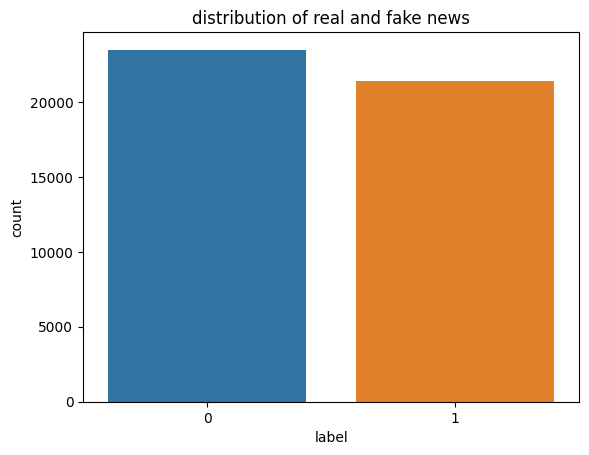

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df["label"])
plt.title('distribution of real and fake news')
plt.show()

Text(0.5, 1.0, 'distribution of subjects')

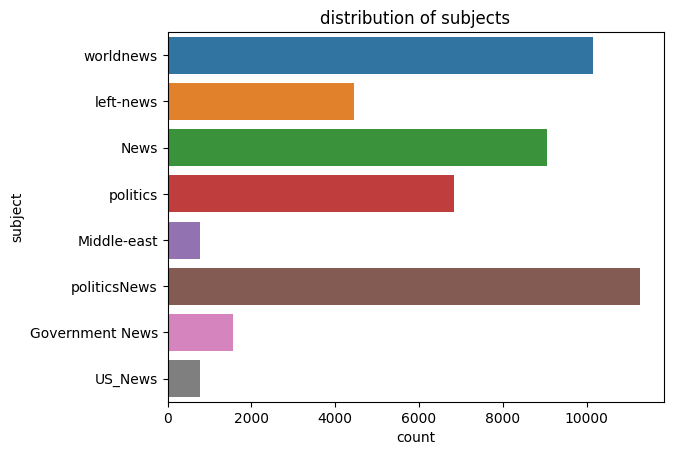

In [37]:
sns.countplot(y = df['subject'])
plt.title("distribution of subjects")

for Fake News

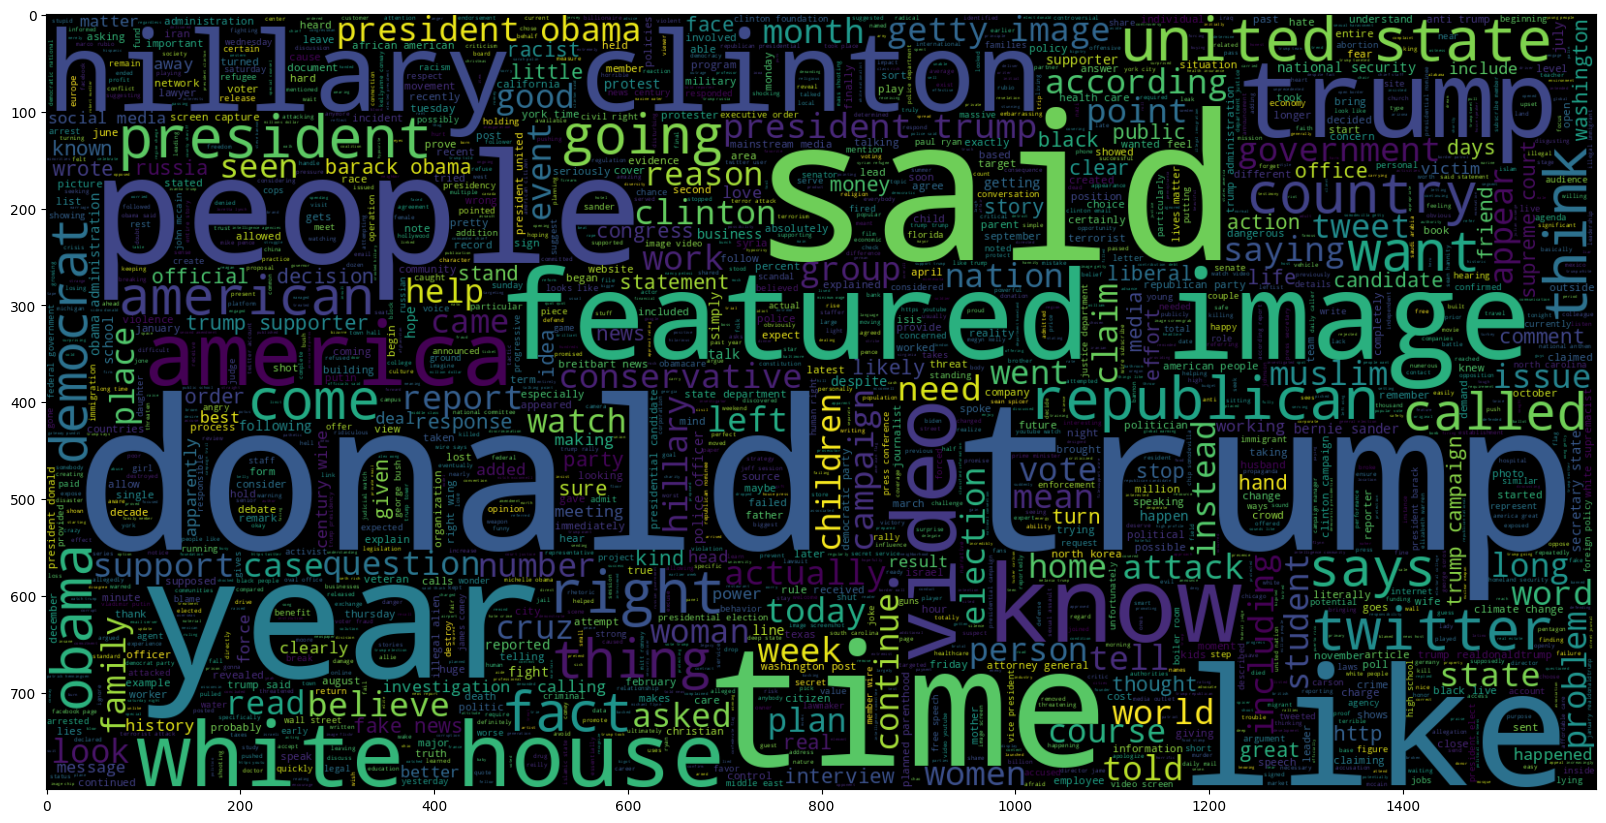

In [39]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.label == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

for True News

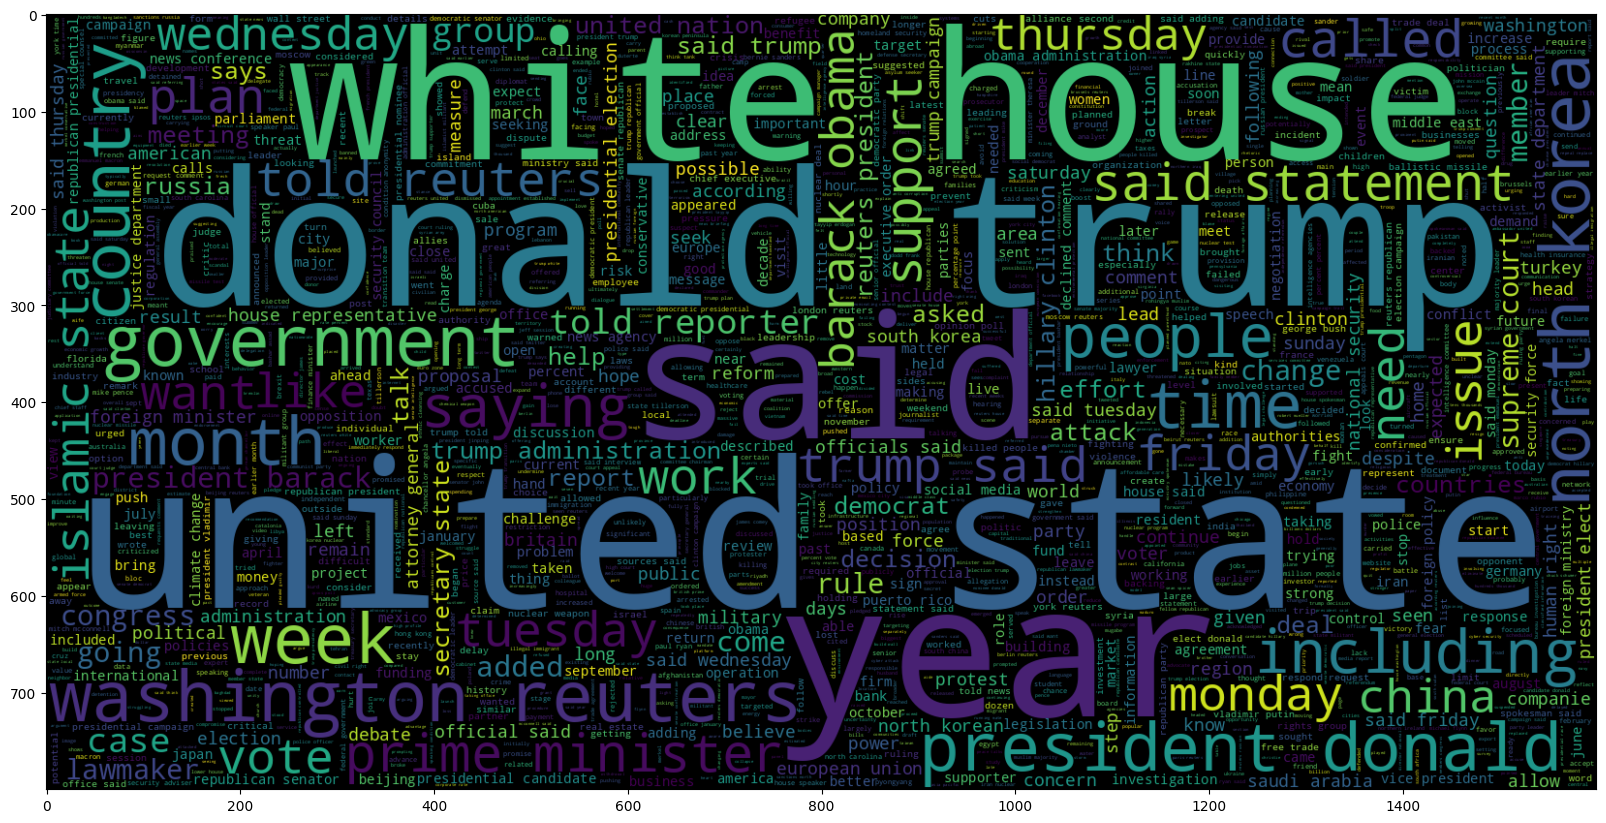

In [41]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.label == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [42]:
nltk.word_tokenize(df['clean_joined'][1])

['iraqi',
 'kurdistan',
 'leader',
 'barzani',
 'hand',
 'presidential',
 'powers',
 'november',
 'sulaimaniya',
 'iraq',
 'reuters',
 'iraqi',
 'kurdistan',
 'veteran',
 'leader',
 'masoud',
 'barzani',
 'extend',
 'presidential',
 'term',
 'kurdish',
 'government',
 'official',
 'said',
 'saturday',
 'decision',
 'came',
 'weeks',
 'referendum',
 'kurdish',
 'independence',
 'backfired',
 'triggered',
 'crisis',
 'iraq',
 'kurds',
 'enjoying',
 'period',
 'unprecedented',
 'autonomy',
 'plan',
 'divide',
 'president',
 'powers',
 'outlined',
 'letter',
 'barzani',
 'sent',
 'kurdish',
 'parliament',
 'saturday',
 'official',
 'told',
 'reuters',
 'plan',
 'asks',
 'parliament',
 'distribute',
 'president',
 'powers',
 'government',
 'parliament',
 'judiciary',
 'barzani',
 'current',
 'term',
 'expire',
 'days',
 'date',
 'presidential',
 'parliamentary',
 'elections',
 'held',
 'elections',
 'delayed',
 'indefinitely',
 'week',
 'amidst',
 'escalating',
 'regional',
 'crisis',
 'cri

In [43]:
# length of maximum document will be needed to create word embeddings
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 4405


In [44]:
# visualize the distribution of number of words in a text
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

In [45]:
# split data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.label, test_size = 0.2)

In [46]:
from nltk import word_tokenize

In [47]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [48]:
len(train_sequences)

35918

In [49]:
len(test_sequences)

8980

In [50]:
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 britain says syrian reconstruction political transition away assad york reuters britain united states countries opposed syrian president bashar assad support reconstruction country political transition away assad british foreign secretary boris johnson said monday believe forward political process going clear iranians russians assad regime like minded group support reconstruction syria political process means resolution says transition away assad said johnson speaking meeting countries syrian opposition including france saudi arabia turkey united states 
 is :  [4457, 12059, 14988, 4278, 2579, 1125, 2579, 3964, 1256, 10939, 12059, 14988, 2579, 4278, 454, 9590, 4174, 1784, 2676, 613, 45, 1125, 11593, 4155, 14755, 7902, 4581, 45, 4457, 2907, 864, 282, 15991, 1801, 1346, 627, 1658, 6345, 65319, 4155, 7902, 2176, 7954, 43165, 1701, 60, 574, 653, 234, 7902, 5069, 2579, 21, 445, 5420, 91, 21, 135, 4457, 38303, 4119, 60, 2311, 2019, 8916, 1377, 17181, 12059, 14988, 

In [51]:
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')

In [52]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [ 4457 12059 14988  4278  2579  1125  2579  3964  1256 10939 12059 14988
  2579  4278   454  9590  4174  1784  2676   613    45  1125 11593  4155
 14755  7902  4581    45  4457  2907   864   282 15991  1801  1346   627
  1658  6345 65319  4155]
The padded encoding for document 2  is :  [2460 1158 6848  923 7631  348 1058  185  401  503  121 1749 8248  977
 7324 2460 1158  605   22  313  173  975 8331  992 2986  621 9807  911
  145  951 4849 1116   48 1158 8480  118 1971    6   42  107]


In [53]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128))) # no of neurons

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid')) # reason: we do binary classification here
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         13914112  
                                                                 
 bidirectional (Bidirection  (None, 256)               263168    
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14210305 (54.21 MB)
Trainable params: 14210305 (54.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
y_train = np.asarray(y_train)

In [55]:
# train the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 10)


Epoch 1/10
506/506 [==============================] - 35s 48ms/step - loss: 0.0389 - acc: 0.9858 - val_loss: 0.0046 - val_acc: 0.9992
Epoch 2/10
506/506 [==============================] - 8s 15ms/step - loss: 0.0014 - acc: 0.9997 - val_loss: 0.0054 - val_acc: 0.9989
Epoch 3/10
506/506 [==============================] - 8s 15ms/step - loss: 4.3897e-04 - acc: 1.0000 - val_loss: 0.0074 - val_acc: 0.9989
Epoch 4/10
506/506 [==============================] - 7s 14ms/step - loss: 3.1370e-04 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 0.9986
Epoch 5/10
506/506 [==============================] - 7s 14ms/step - loss: 8.7091e-04 - acc: 0.9998 - val_loss: 0.0082 - val_acc: 0.9986
Epoch 6/10
506/506 [==============================] - 7s 13ms/step - loss: 0.0017 - acc: 0.9996 - val_loss: 0.0078 - val_acc: 0.9975
Epoch 7/10
506/506 [==============================] - 7s 13ms/step - loss: 7.7062e-04 - acc: 0.9998 - val_loss: 0.0090 - val_acc: 0.9986
Epoch 8/10
506/506 [==============================] 

In [56]:
pred = model.predict(padded_test)

281/281 [==============================] - 2s 3ms/step


In [57]:
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [58]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)


Model Accuracy :  0.9978841870824053


<Axes: >

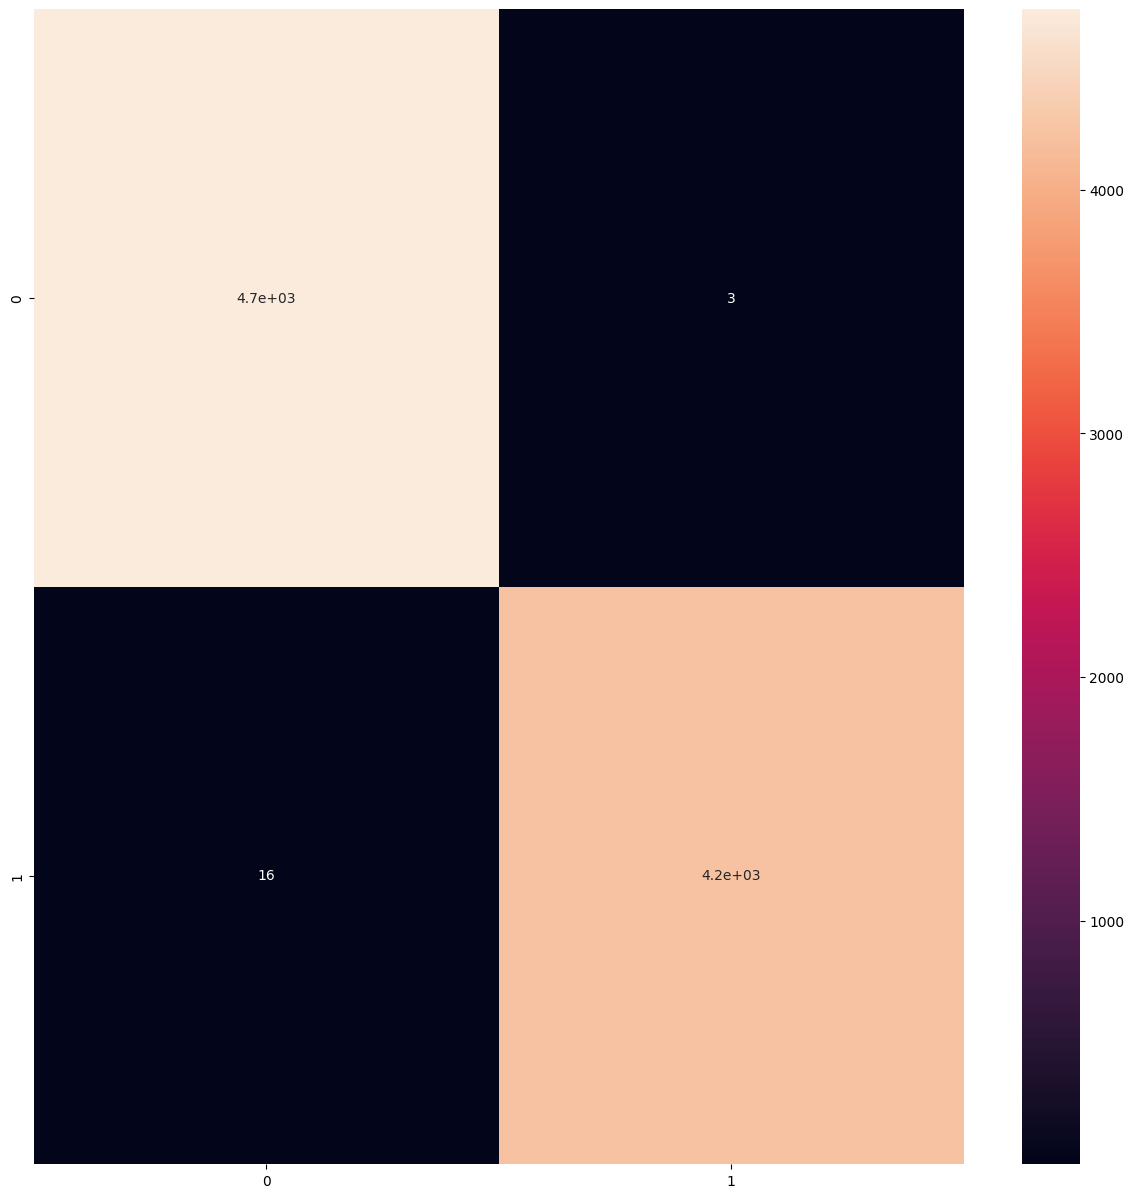

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (15, 15))
sns.heatmap(cm, annot = True)